# SI 618 Homework #4

## Taylor Swift songs

Last updated 2023-10-04

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Each of the questions is worth the same number of points, except for the final bonus question, which is worth up to an additional 2 points (out of 100).  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

Uniqname: Mattcalc

Co-Pilot was used to aid with this assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# disable warnings
warnings.filterwarnings("ignore")

In [3]:
features = [
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
]

Q1: Show the distribution of the popularity of the songs.  Then exclude the songs that are from karaoke albums (i.e., the album name contains "karaoke").  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?

In [4]:
# Read in the data
taylor_df = pd.read_csv("../data/taylor_swift_spotify.csv")
taylor_df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.204000,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.059300,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.133000,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.735000,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.416000,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,Mary's Song (Oh My My My) - Instrumental w/ BG...,Taylor Swift Karaoke,2006-10-24,10,5YluKOG2VGcJMO8XVMpg9h,spotify:track:5YluKOG2VGcJMO8XVMpg9h,0.000081,0.475,0.529,0.562000,0.1460,-10.802,0.0317,151.000,0.3010,5,216226
1261,1261,Our Song - Instrumental w/ BG vocals,Taylor Swift Karaoke,2006-10-24,11,0PHdWHKV69ZNQyfYLBlVAT,spotify:track:0PHdWHKV69ZNQyfYLBlVAT,0.032600,0.528,0.484,0.001650,0.1400,-9.266,0.0316,178.299,0.5850,12,204306
1262,1262,I'm Only Me When I'm With You - Instrumental w...,Taylor Swift Karaoke,2006-10-24,12,4Vg8MqpDQFDfKmXdpO1jD3,spotify:track:4Vg8MqpDQFDfKmXdpO1jD3,0.000053,0.541,0.796,0.820000,0.3260,-8.833,0.0306,144.004,0.8470,5,223386
1263,1263,Invisible - Instrumental w/ BG vocals,Taylor Swift Karaoke,2006-10-24,13,7Fg8MxumrT8axFZVzN1MtT,spotify:track:7Fg8MxumrT8axFZVzN1MtT,0.259000,0.575,0.279,0.572000,0.0941,-12.066,0.0286,96.007,0.1180,4,206480


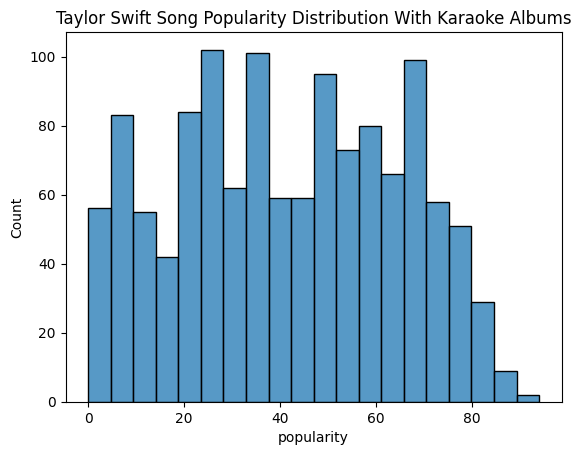

In [5]:
sns.histplot(data=taylor_df, x="popularity", bins=20)
plt.title("Taylor Swift Song Popularity Distribution With Karaoke Albums")
plt.show()

In [6]:
# remove kareoke albums
no_kareoke = taylor_df[
    taylor_df["album"].str.lower().str.contains(r"\b[Kk]araoke\b", regex=True)
    == False
]
no_kareoke

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,1232,Invisible,Taylor Swift (Big Machine Radio Release Special),2006-10-24,26,76aEO0XTIeZt8bwpo2Zlz2,spotify:track:76aEO0XTIeZt8bwpo2Zlz2,0.5970,0.612,0.384,0.000000,0.1640,-5.731,0.0240,96.020,0.2040,32,205853
1233,1233,A Perfectly Good Heart - Commentary,Taylor Swift (Big Machine Radio Release Special),2006-10-24,27,0MdvaY1bXQVxkInYNCQc7y,spotify:track:0MdvaY1bXQVxkInYNCQc7y,0.8390,0.644,0.248,0.000000,0.1180,-12.282,0.9310,81.209,0.5600,22,69432
1234,1234,A Perfectly Good Heart,Taylor Swift (Big Machine Radio Release Special),2006-10-24,28,5BIp0co0t2WOHt1ttmSUrw,spotify:track:5BIp0co0t2WOHt1ttmSUrw,0.0036,0.489,0.760,0.000000,0.1110,-5.713,0.0362,156.088,0.2730,29,222146
1235,1235,Teardrops On My Guitar - Pop Version / Commentary,Taylor Swift (Big Machine Radio Release Special),2006-10-24,29,0q0YAWyXhDggKzeicHhtfa,spotify:track:0q0YAWyXhDggKzeicHhtfa,0.8810,0.645,0.320,0.000000,0.1490,-11.998,0.9310,80.865,0.7050,23,82400


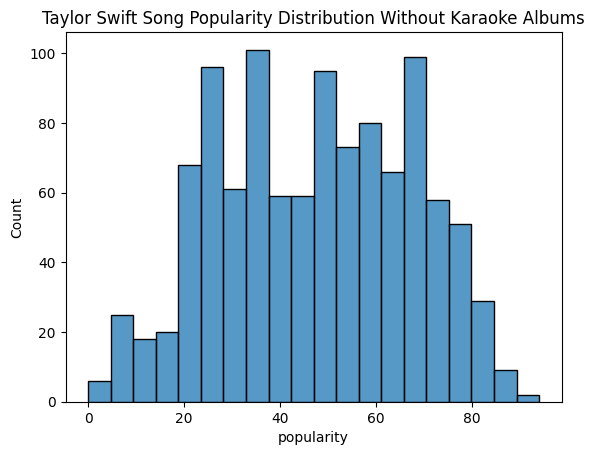

In [7]:
sns.histplot(data=no_kareoke, x="popularity", bins=20)
plt.title("Taylor Swift Song Popularity Distribution Without Karaoke Albums")
plt.show()

It was assumed that a Karaoke album was any album with karaoke in the album name.

The distribution of Taylor Swift song popularity is quite different when including or not including karaoke albums.

The distribution of all song popularity shows a closer to uniform distribution, with a slight right skew. The median popularity appears to be around 40.

In comparison the distribution of song popularity without karaoke albums, the distribution appears to be closer to a normal distribution with a slight left skew. This is cetnered around a peak at roughly 45. 

The biggest conclusion to be drawn from the two distributions is that it appears that karaoke albums increased the number of song with a popularity below 20.

### <font color='magenta'>IMPORTANT NOTE: the remainder of the questions are based on the songs that are NOT from karaoke albums.</font>

Q2: Report the average track duration for each album.  You answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset.

In [8]:
# Convert ms to s
no_kareoke["track_duration_s"] = no_kareoke["duration_ms"] / 1000
# Find mean and sort
avg_track_duration = (
    no_kareoke.groupby("album")["track_duration_s"]
    .mean()
    .sort_values(ascending=False)
)

# Format duration to mm:ss
avg_track_duration_f = avg_track_duration.apply(
    lambda x: f"{int(x // 60)}:{x%60:02.0f}"
)
avg_track_duration_f

album
Speak Now World Tour Live                                                              4:57
Speak Now (US Version)                                                                 4:47
Speak Now                                                                              4:47
Speak Now (Japanese Version)                                                           4:46
Speak Now (Deluxe Package)                                                             4:36
Speak Now (Deluxe Edition)                                                             4:36
Red (Taylor's Version)                                                                 4:21
Fearless Platinum Edition                                                              4:11
Fearless (Platinum Edition)                                                            4:11
Red (Deluxe Edition)                                                                   4:07
Fearless (Taylor's Version)                                               

The average track duration of each album in the dataset is shown as a result of the code above.

The longest average track length album was Speak Now World Tour Live at 4:57, while the shortest was Taylor Swift (Big Machine Radio Release Special) at 2:27.

Most albums fall between 3:20 and 4:11 for avergage track length


Q3: Show a heatmap of the correlations between the features.  Use a diverging colormap with white in the middle (i.e. white at a correlation of 0.0).

In [9]:
taylor_corr = no_kareoke[features].corr()
taylor_corr

,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
danceability,1.000000,-0.073056,-0.021544,-0.034634,-0.138921,0.350922,-0.240997,0.415063
energy,-0.073056,1.000000,0.010537,0.074975,0.817729,-0.409169,0.266027,0.306586
instrumentalness,-0.021544,0.010537,1.000000,-0.038933,-0.098910,-0.052273,-0.026519,-0.024569
liveness,-0.034634,0.074975,-0.038933,1.000000,0.007121,0.163912,-0.030562,0.023628
loudness,-0.138921,0.817729,-0.098910,0.007121,1.000000,-0.549766,0.249124,0.108877
speechiness,0.350922,-0.409169,-0.052273,0.163912,-0.549766,1.000000,-0.210773,0.298715
tempo,-0.240997,0.266027,-0.026519,-0.030562,0.249124,-0.210773,1.000000,-0.002296
valence,0.415063,0.306586,-0.024569,0.023628,0.108877,0.298715,-0.002296,1.000000


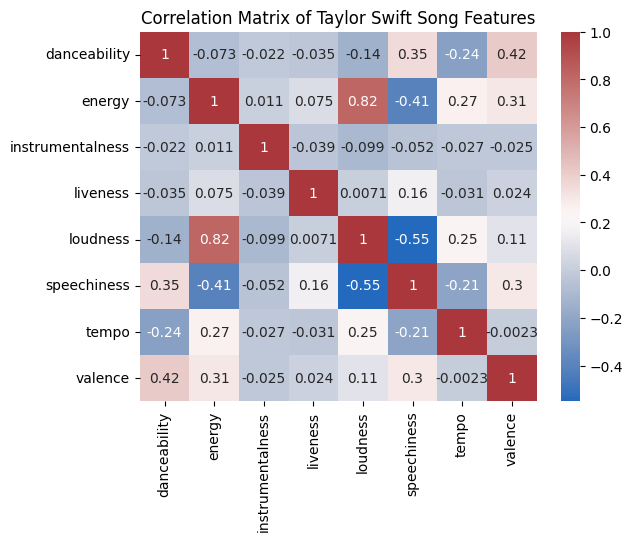

In [10]:
sns.heatmap(taylor_corr, annot=True, cmap="vlag")
plt.title("Correlation Matrix of Taylor Swift Song Features")
plt.show()

When analysing the correlation between song features and creating a heatmap of the correlation, it was found that loudness and energy had the greatest correlation 0.82, followed by loudness and speechiness at -0.55 and speechiness and energy at -0.41

These findings may indicate that loudness, energy, and speechiness have the greatest effect on each other compared to other features

Q4: List the top 5 correlations between the features of the songs.

In [11]:
taylor_corr = taylor_corr.unstack().reset_index()
taylor_corr

,level_0,level_1,0
0,danceability,danceability,1.000000
1,danceability,energy,-0.073056
2,danceability,instrumentalness,-0.021544
3,danceability,liveness,-0.034634
4,danceability,loudness,-0.138921
...,...,...,...
59,valence,liveness,0.023628
60,valence,loudness,0.108877
61,valence,speechiness,0.298715
62,valence,tempo,-0.002296


In [12]:
# taylor_corr[taylor_corr['level_0'] != 'level_1'].sort_values(0, ascending=False)
mask = taylor_corr["level_0"] != taylor_corr["level_1"]
# taylor_corr[0] = taylor_corr[0].apply(abs)
taylor_corr[mask].sort_values(0, ascending=False, key=abs)[::2].head(5)

,level_0,level_1,0
33,loudness,energy,0.817729
37,loudness,speechiness,-0.549766
56,valence,danceability,0.415063
13,energy,speechiness,-0.409169
5,danceability,speechiness,0.350922


The top 5 correlations of song features are as follow
- loudness & energy = 0.82
- loudness & speechiness = -0.55
- valence & danceability = 0.42
- energy & speechiness = -0.41
- danceability & speechiness = 0.35

Q5: Does the position of the track on the album (i.e. track number) have an effect on the popularity of the song?  Use both visual and statistical evidence to support your answer.

In [13]:
model0 = smf.ols("track_number ~ popularity", data=no_kareoke).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           track_number   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     33.51
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           9.28e-09
Time:                        10:56:32   Log-Likelihood:                -3681.8
No. Observations:                1075   AIC:                             7368.
Df Residuals:                    1073   BIC:                             7378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1068      0.581     24.279      0.000      12.967      15.247
popularity    -0.0655      0.011     -5.789      0.000      -0.088      -0.043
==============================================================================
Omnibus:                      194.474   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.962
Skew:                           1.089   Prob(JB):                     1.13e-78
Kurtosis:                       4.809   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

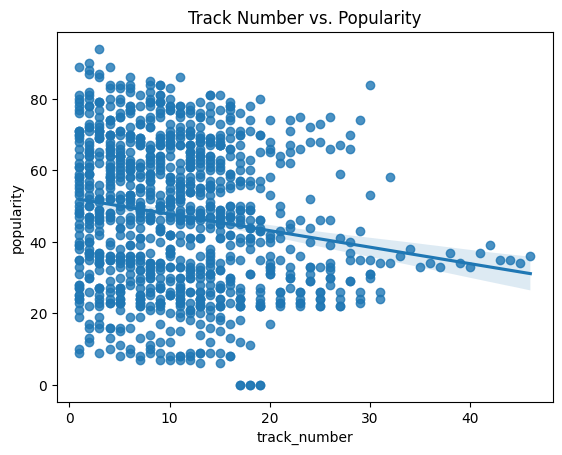

In [14]:
sns.regplot(data=no_kareoke, x="track_number", y="popularity")
plt.title("Track Number vs. Popularity")
plt.show()

In [15]:
model02 = smf.ols(
    "track_number ~ popularity",
    data=no_kareoke[no_kareoke["track_number"] < 10],
).fit()
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           track_number   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.206
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.273
Time:                        10:56:33   Log-Likelihood:                -1210.9
No. Observations:                 512   AIC:                             2426.
Df Residuals:                     510   BIC:                             2434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3001      0.303     17.509      0.000       4.705       5.895
popularity    -0.0061      0.006     -1.098      0.273      -0.017       0.005
==============================================================================
Omnibus:                      368.439   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.577
Skew:                          -0.000   Prob(JB):                     1.39e-07
Kurtosis:                       1.783   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There does appear to be a negative correlation between track number and popularity.

There is a signifigantly small p-value (< 0.05)

This would indicate that we would assume that if a song is later on an album, the popularity would be lower.

it is important to note that the variance for track numbers under 20 is signifigantly greater than those above 20.




Further Investigation was done, and for track numbers from 0-10 there was no statistical signifigance that track number has an affect on popularity (p-value = 0.273).

Q6: Are popular songs more danceable?
Divide the songs into popular (i.e. those with a popularity rating of 60 or higher) and less popular (i.e. those with a popularity rating of less than 60).
Conduct an ANOVA test for the two groups of data based on danceability feature. Are they statistically significant?

In [16]:
no_kareoke["popular"] = pd.cut(
    no_kareoke["popularity"],
    bins=[0, 60, np.inf],
    labels=["not popular", "popular"],
    right=False,
)

model1 = smf.ols("danceability ~ popular", data=no_kareoke).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.436
Date:                Thu, 12 Oct 2023   Prob (F-statistic):             0.0354
Time:                        10:56:33   Log-Likelihood:                 825.75
No. Observations:                1075   AIC:                            -1647.
Df Residuals:                    1073   BIC:                            -1638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5991      0.004    144.084      0.000       0.591       0.607
popular[T.popular]    -0.0155      0.007     -2.106      0.035      -0.030      -0.001
==============================================================================
Omnibus:                       17.597   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.082
Skew:                          -0.298   Prob(JB):                     0.000118
Kurtosis:                       3.218   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
popular,0.055988,1.0,4.435697,0.035427
Residual,13.543677,1073.0,NaN,NaN


The p-value resulting from the ANOVA test is 0.035, which is less than 0.05, indicating that there is a statistical signifigance between the two groups.

This would indicate that popular songs are more danceable than less popular songs.



Q7: Create a regression model with "popularity" as the dependent variable and "liveness" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "popularity" when the value of "liveness" is 0.22.

In [18]:
model2 = smf.ols("popularity ~ liveness", data=no_kareoke).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.12
Date:                Thu, 12 Oct 2023   Prob (F-statistic):            0.00150
Time:                        10:56:33   Log-Likelihood:                -4743.8
No. Observations:                1075   AIC:                             9492.
Df Residuals:                    1073   BIC:                             9502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8667      1.017     49.048      0.000      47.872      51.862
liveness     -16.1986      5.091     -3.182      0.002     -26.188      -6.210
==============================================================================
Omnibus:                      183.152   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.318
Skew:                          -0.056   Prob(JB):                     1.07e-09
Kurtosis:                       2.046   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
intercept, slope = model2.params

liveness = 0.22

popularity = intercept + slope * liveness

popularity

46.30295598962267

The r^2 value of the liveness popularity regression is 0.009

The p-value of the regression is 0.0015, which is less than 0.05, indicating that the regression is statistically significant.

There is a signifigant effect of popularity on the liveness of a Taylor Swift song.


The estimate for the value of popularity when liveness is 0.22 is 46.303


Q8: Due to intellectual property conflicts, Taylor Swift re-recorded some of her earlier albums, including `Fearless` and `Red`.  We assume that re-recording her early albums will allow Taylor Swift to reclaim her artistry control, revisit the songs and make any changes she wants. Therefore, we want to see whether the new songs are more loved by the audiences by looking at the popularity score. 

* The re-recorded ones have `(Taylor’s version)` at the end of the album name.

a) Create a visualization that shows the distribution of popularity scores of original vs. re-recorded songs.  There are multiple visualizations that would be appropriate here.  You can choose any of them.  At a minimum, you should create one visualization.  Creating additional ones can earn you additional points.

b) Is there a statistically significant difference between the popularity scores of the original and re-recorded songs?  If so, which one is more popular?  How much more popular is it, on average?

In [20]:
red = no_kareoke[
    (no_kareoke["album"] == "Red")
    | (no_kareoke["album"] == "Red (Taylor's Version)")
]

# filter out karaoke songs
red = red[red["name"].str.contains("Karaoke") == False]

# make a tag for taylor's version
red["taylors"] = red["album"].str.contains("Taylor's Version")

In [21]:
red[red["taylors"] == True]
# The album shows up twice for Taylor's Version, so we will remove the second copy (30 tracks in the album)
red[red["taylors"] == True] = red[red["taylors"] == True][0:30]
red[red["taylors"] == True]

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,...,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,track_duration_s,popular,taylors
66,66.0,State Of Grace (Taylor's Version),Red (Taylor's Version),2021-11-12,1.0,6lzc0Al0zfZOIFsFvBS1ki,spotify:track:6lzc0Al0zfZOIFsFvBS1ki,0.000328,0.594,0.713,...,0.1140,-5.314,0.0503,129.958,0.328,71.0,295413.0,295.413,popular,True
67,67.0,Red (Taylor's Version),Red (Taylor's Version),2021-11-12,2.0,4OAuvHryIVv4kMDNSLuPt6,spotify:track:4OAuvHryIVv4kMDNSLuPt6,0.001080,0.516,0.777,...,0.0761,-4.908,0.0375,125.047,0.408,78.0,223093.0,223.093,popular,True
68,68.0,Treacherous (Taylor's Version),Red (Taylor's Version),2021-11-12,3.0,3S7HNKPakdwNEBFIVTL6dZ,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,0.034400,0.645,0.593,...,0.1300,-6.506,0.0288,109.984,0.299,71.0,242720.0,242.720,popular,True
69,69.0,I Knew You Were Trouble (Taylor's Version),Red (Taylor's Version),2021-11-12,4.0,6AtZLIzUINvExIUy4QhdjP,spotify:track:6AtZLIzUINvExIUy4QhdjP,0.012900,0.584,0.557,...,0.0576,-6.371,0.0342,154.008,0.767,78.0,219760.0,219.760,popular,True
70,70.0,All Too Well (Taylor's Version),Red (Taylor's Version),2021-11-12,5.0,3nsfB1vus2qaloUdcBZvDu,spotify:track:3nsfB1vus2qaloUdcBZvDu,0.017100,0.440,0.528,...,0.2340,-7.809,0.0317,185.972,0.132,75.0,329160.0,329.160,popular,True
71,71.0,22 (Taylor's Version),Red (Taylor's Version),2021-11-12,6.0,3yII7UwgLF6K5zW3xad3MP,spotify:track:3yII7UwgLF6K5zW3xad3MP,0.000443,0.642,0.695,...,0.0753,-5.620,0.0281,103.984,0.642,76.0,230960.0,230.960,popular,True
72,72.0,I Almost Do (Taylor's Version),Red (Taylor's Version),2021-11-12,7.0,2r9CbjYgFhtAmcFv1cSquB,spotify:track:2r9CbjYgFhtAmcFv1cSquB,0.016700,0.511,0.559,...,0.1130,-6.587,0.0264,145.880,0.248,69.0,244586.0,244.586,popular,True
73,73.0,We Are Never Ever Getting Back Together (Taylo...,Red (Taylor's Version),2021-11-12,8.0,5YqltLsjdqFtvqE7Nrysvs,spotify:track:5YqltLsjdqFtvqE7Nrysvs,0.031700,0.567,0.686,...,0.0732,-6.139,0.1750,172.014,0.716,79.0,193146.0,193.146,popular,True
74,74.0,Stay Stay Stay (Taylor's Version),Red (Taylor's Version),2021-11-12,9.0,7eQj6r5PIdYKEIZjucBMcq,spotify:track:7eQj6r5PIdYKEIZjucBMcq,0.084800,0.693,0.681,...,0.0768,-7.039,0.0250,100.020,0.663,69.0,205786.0,205.786,popular,True
75,75.0,The Last Time (feat. Gary Lightbody of Snow Pa...,Red (Taylor's Version),2021-11-12,10.0,0y6kdSRCVQhSsHSpWvTUm7,spotify:track:0y6kdSRCVQhSsHSpWvTUm7,0.039900,0.502,0.534,...,0.0977,-5.954,0.0278,94.050,0.155,71.0,299080.0,299.080,popular,True


In [22]:
fearless = no_kareoke[
    (no_kareoke["album"] == "Fearless")
    | (no_kareoke["album"] == "Fearless (Taylor's Version)")
]

fearless = fearless[fearless["name"].str.contains("Karaoke") == False]

# make a tag for taylor's version
fearless["taylors"] = fearless["album"].str.contains("Taylor's Version")

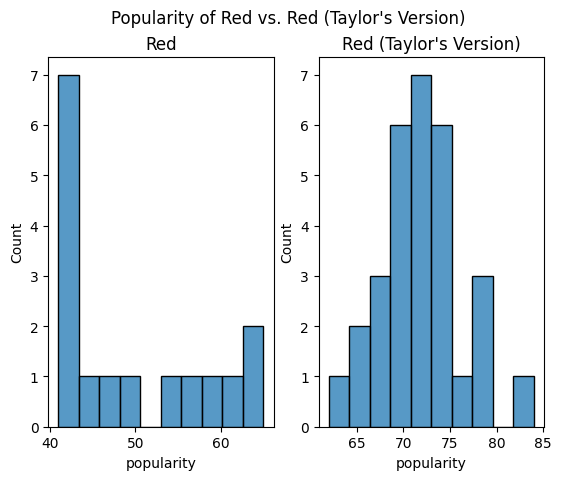

In [23]:
fig, ax = plt.subplots(1, 2)
sns.histplot(data=red[red.taylors == False], x="popularity", bins=10, ax=ax[0])
ax[0].set_title("Red")
sns.histplot(data=red[red.taylors == True], x="popularity", bins=10, ax=ax[1])
ax[1].set_title("Red (Taylor's Version)")
fig.suptitle("Popularity of Red vs. Red (Taylor's Version)")
plt.show()

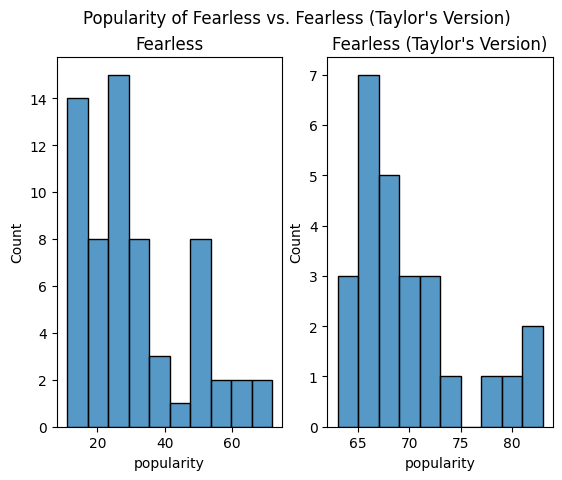

In [24]:
fig, ax = plt.subplots(1, 2)
sns.histplot(
    data=fearless[fearless.taylors == False], x="popularity", bins=10, ax=ax[0]
)
ax[0].set_title("Fearless")
sns.histplot(
    data=fearless[fearless.taylors == True], x="popularity", bins=10, ax=ax[1]
)
ax[1].set_title("Fearless (Taylor's Version)")
fig.suptitle("Popularity of Fearless vs. Fearless (Taylor's Version)")
plt.show()

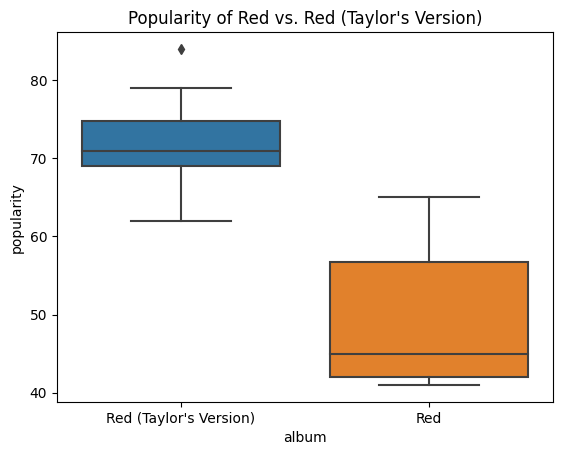

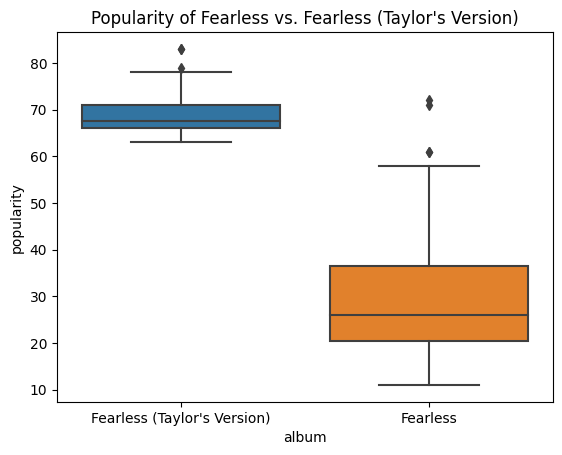

In [25]:
# boxlpots

sns.boxplot(data=red, x="album", y="popularity")
plt.title("Popularity of Red vs. Red (Taylor's Version)")
plt.show()

sns.boxplot(data=fearless, x="album", y="popularity")
plt.title("Popularity of Fearless vs. Fearless (Taylor's Version)")
plt.show()

In [26]:
# compares popularity of songs on each album in red
model3 = smf.ols("popularity ~ album", data=red).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     119.0
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           4.25e-14
Time:                        10:56:34   Log-Likelihood:                -150.53
No. Observations:                  46   AIC:                             305.1
Df Residuals:                      44   BIC:                             308.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          49.5625      1.631     30.385      0.000      46.275      52.850
album[T.Red (Taylor's Version)]    22.0375      2.020     10.911      0.000      17.967      26.108
==============================================================================
Omnibus:                        3.985   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.582
Skew:                           0.681   Prob(JB):                        0.167
Kurtosis:                       2.877   Cond. No.                         3.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model4 = smf.ols("popularity ~ album", data=fearless).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     149.4
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.40e-20
Time:                        10:56:34   Log-Likelihood:                -356.87
No. Observations:                  89   AIC:                             717.7
Df Residuals:                      87   BIC:                             722.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               31.0952      1.700     18.290      0.000      27.716      34.474
album[T.Fearless (Taylor's Version)]    38.4432      3.145     12.222      0.000      32.191      44.695
==============================================================================
Omnibus:                       15.580   Durbin-Watson:                   0.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.525
Skew:                           1.021   Prob(JB):                     0.000156
Kurtosis:                       3.744   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the distributions of popularity scores of original vs. re-recorded songs, it appears that the re-recorded songs are more popular than the original songs.

For the album Red, the original songs range from 40-70 in popularity, while the re-recorded songs range from 60-85 in popularity.

For the album Fearless, the original songs range from 10-70 in popularity, while the re-recorded songs range from 60-85 in popularity.

Based on the box plots generated, we can determine that the re-recorded songs (Taylor's Version) are more popular than the original songs.

We can confirm this through an order of least squares regression where for both Red and Fearless, the p-value is less than 0.05, indicating that there is a statistical signifigance between the popularity of the original and re-recorded albums.

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

I would determine whether Taylor Swift has had an effect on the popularity of football by looking at the number of people who watch Kansas City Chiefs games before and after she started dating Travis Kelce.

To complete this analysis we would need historical data of the viewership numbers of Kansas City Chiefs games before they started dating, as well as the viewership data for games after they started dating.

We would then perform a least squares regression to determine if there is a statistical signifigance between the viewership numbers before and after they started dating.

We would expect that there is a signifiganct increase in viewership after they started dating, since football viewership has reasonably steady viewership and any consistent increase would be signifigant.

### Submit your completed assignment in both IPYNB and HTML formats.